In [2]:
import numpy as np
import random

numpy 的精髓就在于向量化（Vectorization），如果你是 Python 用户，这一点恐怕是你面临最大的困难，因为你需要改变

In [3]:
class RandomWalker:
    def __init__(self):
        self.position = 0

    def walk(self, n):
        self.position = 0
        for i in range(n):
            yield self.position
            self.position += 2*random.randint(0, 1) - 1

In [4]:
walker = RandomWalker()

In [8]:
%timeit list(walker.walk(10000))

8.08 ms ± 345 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
def random_walk(n):
    position = 0
    walk = [position]
    for i in range(n):
        position += 2*random.randint(0, 1)-1
        walk.append(position)
    
    return walk

In [10]:
%timeit random_walk(10000)

7.76 ms ± 868 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
def random_walk_accu(n):
    from itertools import accumulate
    steps = random.choices([-1, 1], k=n)
    return [0] + list(accumulate(steps))

In [12]:
%timeit random_walk_vectorize(10000)

1.18 ms ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
def random_walk_numpy(n):
    steps = np.random.choice([-1, 1], n)
    return np.cumsum(steps)

In [14]:
%timeit random_walk_numpy(10000)

84 µs ± 701 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [17]:
Z = np.random.uniform(0,1,(5,5))
Z[:3, :]

array([[0.18868688, 0.17044232, 0.36453915, 0.67010373, 0.01888855],
       [0.29576431, 0.32145696, 0.75989134, 0.87196238, 0.0639664 ],
       [0.6683426 , 0.31539345, 0.35128692, 0.93317567, 0.45958432]])

In [31]:
z = np.arange(9).reshape(3,3).astype(np.int16)
print(f"{z.itemsize = }")
print(f"{z.shape = }")
print(f"{z.ndim = }")
print(f"{z.strides = }")
strides = z.shape[1]*z.itemsize, z.itemsize
print(f"{strides = }")
print(f"{z.tobytes() = }")
# compute the right offset
index = 1, 1
offset_start = 0
for i in range(z.ndim):
    offset_start += z.strides[i]*index[i]
offset_end = offset_start + z.itemsize
print(f"{z.tobytes()[offset_start: offset_end] = }")
print(f"{z[index].tobytes() = }")

z.itemsize = 2
z.shape = (3, 3)
z.ndim = 2
z.strides = (6, 2)
strides = (6, 2)
z.tobytes() = b'\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00'
z.tobytes()[offset_start: offset_end] = b'\x04\x00'
z[index].tobytes() = b'\x04\x00'


In [42]:
z = np.zeros(9)
z_view = z[:3]
z_view[...] = 1
print(f"{z = }")
print(f"To check if it is copy or view: {z_view.base is z = }")
# ------
z = np.zeros(9)
z_copy = z[[0,1,2]]
z_copy[...] = 1
print(f"{z = }")
print(f"To check if it is copy or view: {z_copy.base is z = }")

z = array([1., 1., 1., 0., 0., 0., 0., 0., 0.])
To check if it is copy or view: z_view.base is z = True
z = array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
To check if it is copy or view: z_copy.base is z = False


In [38]:
Z = np.zeros(9)
index = [0,1,2]
Z[index] = 1
Z[::2] = 1
print(f"{Z = }")

Z = array([1., 1., 1., 0., 1., 0., 1., 0., 1.])


## Uniform 向量化

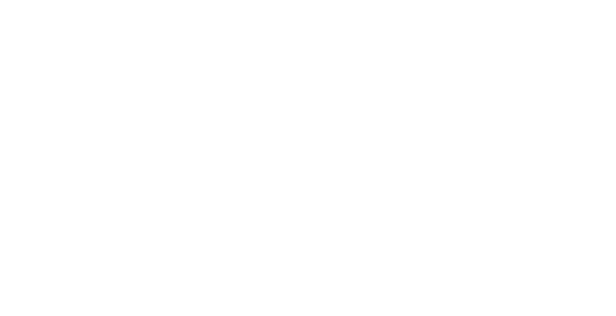

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def update(*args):
    global Z, M

    N = (Z[0:-2, 0:-2] + Z[0:-2, 1:-1] + Z[0:-2, 2:] +
         Z[1:-1, 0:-2]                 + Z[1:-1, 2:] +
         Z[2:  , 0:-2] + Z[2:  , 1:-1] + Z[2:  , 2:])
    birth = (N == 3) & (Z[1:-1, 1:-1] == 0)
    survive = ((N == 2) | (N == 3)) & (Z[1:-1, 1:-1] == 1)
    Z[...] = 0
    Z[1:-1, 1:-1][birth | survive] = 1

    # Show past activities
    M[M>0.25] = 0.25
    M *= 0.995
    M[Z==1] = 1
    # Direct activity
    # M[...] = Z
    im.set_data(M)


Z = np.random.randint(0, 2, (300, 600))
M = np.zeros(Z.shape)

size = np.array(Z.shape)
dpi = 80.0
figsize = size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(M, interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
plt.xticks([]), plt.yticks([])

animation = FuncAnimation(fig, update, interval=10, frames=2000)
# animation.save('game-of-life.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
#                extra_args=['-pix_fmt', 'yuv420p'],
#                metadata={'artist':'Nicolas P. Rougier'})
plt.show()

In [46]:
Z = np.array([[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]])

In [47]:
N = np.zeros(Z.shape, dtype=int)
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

In [63]:
N_ = N.ravel()
Z_ = Z.ravel()

In [72]:
R1 = np.argwhere( (Z_==1) & (N_ < 2) )
R2 = np.argwhere( (Z_==1) & (N_ > 3) )
R3 = np.argwhere( (Z_==1) & ((N_==2) | (N_==3)) )
R4 = np.argwhere( (Z_==0) & (N_==3) )
# Make sure borders stay null
Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0

In [74]:
Z = np.array([[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]])

In [87]:
N = np.zeros(Z.shape, dtype=int)
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])
birth = (N==3)[1:-1,1:-1] & (Z[1:-1,1:-1]==0)
survive = ((N==2) | (N==3))[1:-1,1:-1] & (Z[1:-1,1:-1]==1)
Z[...] = 0
Z[1:-1,1:-1][birth | survive] = 1

In [89]:
Z[ :-2, :-2]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0]])

In [90]:
Z[ :-2,1:-1]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]])

In [86]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [88]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [91]:
def build_maze(shape=(65, 65), complexity=0.75, density=0.50):
    # Only odd shapes
    shape = ((shape[0]//2)*2+1, (shape[1]//2)*2+1)

    # Adjust complexity and density relatively to maze size
    n_complexity = int(complexity*(shape[0]+shape[1]))
    n_density = int(density*(shape[0]*shape[1]))

    # Build actual maze
    Z = np.zeros(shape, dtype=bool)

    # Fill borders
    Z[0, :] = Z[-1, :] = Z[:, 0] = Z[:, -1] = 1

    # Islands starting point with a bias in favor of border
    P = np.random.normal(0, 0.5, (n_density, 2))
    P = 0.5 - np.maximum(-0.5, np.minimum(P, +0.5))
    P = (P*[shape[1], shape[0]]).astype(int)
    P = 2*(P//2)

    # Create islands
    for i in range(n_density):
        # Test for early stop: if all starting point are busy, this means we
        # won't be able to connect any island, so we stop.
        T = Z[2:-2:2, 2:-2:2]
        if T.sum() == T.size: break
        x, y = P[i]
        Z[y, x] = 1
        for j in range(n_complexity):
            neighbours = []
            if x > 1:          neighbours.append([(y, x-1), (y, x-2)])
            if x < shape[1]-2: neighbours.append([(y, x+1), (y, x+2)])
            if y > 1:          neighbours.append([(y-1, x), (y-2, x)])
            if y < shape[0]-2: neighbours.append([(y+1, x), (y+2, x)])
            if len(neighbours):
                choice = np.random.randint(len(neighbours))
                next_1, next_2 = neighbours[choice]
                if Z[next_2] == 0:
                    Z[next_1] = 1
                    Z[next_2] = 1
                    y, x = next_2
            else:
                break
    return Z

In [92]:
def build_graph(maze):
    height, width = maze.shape
    graph = {(i, j): [] for j in range(width)
                        for i in range(height) if not maze[i][j]}
    for row, col in graph.keys():
        if row < height - 1 and not maze[row + 1][col]:
            graph[(row, col)].append(("S", (row + 1, col)))
            graph[(row + 1, col)].append(("N", (row, col)))
        if col < width - 1 and not maze[row][col + 1]:
            graph[(row, col)].append(("E", (row, col + 1)))
            graph[(row, col + 1)].append(("W", (row, col)))
    return graph

In [95]:
maze = build_maze()
graph = build_graph(maze)
from collections import deque

In [96]:
def breadth_first(maze, start, goal):
    queue = deque([([start], start)])
    visited = set()
    graph = build_graph(maze)

    while queue:
        path, current = queue.popleft()
        if current == goal:
            return np.array(path)
        if current in visited:
            continue
        visited.add(current)
        for direction, neighbour in graph[current]:
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None

In [97]:
import numpy as np

class C(np.ndarray):
    def __new__(cls, *args, **kwargs):
        print('In __new__ with class %s' % cls)
        return super().__new__(cls, *args, **kwargs)

    def __init__(self, *args, **kwargs):
        # in practice you probably will not need or want an __init__
        # method for your subclass
        print('In __init__ with class %s' % self.__class__)

    def __array_finalize__(self, obj):
        print('In array_finalize:')
        print('   self type is %s' % type(self))
        print('   obj type is %s' % type(obj))

In [98]:
c = C([1,2])

In __new__ with class <class '__main__.C'>
In array_finalize:
   self type is <class '__main__.C'>
   obj type is <class 'NoneType'>
In __init__ with class <class '__main__.C'>


In [99]:
a = np.arange(10)
cast_a = a.view(C)

In array_finalize:
   self type is <class '__main__.C'>
   obj type is <class 'numpy.ndarray'>


In [104]:
import numpy as np

class RealisticInfoArray(np.ndarray):

    def __new__(cls, input_array, info=None):
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        # add the new attribute to the created instance
        obj.info = info
        # Finally, we must return the newly created object:
        return obj

    def __array_finalize__(self, obj):
        # see InfoArray.__array_finalize__ for comments
        if obj is None: return
        self.info = getattr(obj, 'info', None)

In [110]:
o = RealisticInfoArray(np.arange(4), info='HI Funcoder')

In [111]:
o.info

'HI Funcoder'